### Leads _ Scoring_Case_Study

In [238]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [239]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [240]:
lead.shape

(9240, 37)

In [241]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [242]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [243]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### EDA

In [244]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [245]:
# % of null
round(100*(lead.isnull().sum()) / len(lead.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [246]:
#unique
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [247]:
#Duplicate check
lead.duplicated(subset=['Prospect ID'], keep=False).sum()

0

In [248]:
lead.duplicated(subset=['Lead Number'], keep=False).sum()

0

In [249]:
#we will drop Lead Number and Prospect ID
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace=True)

In [250]:
lead = lead.replace('Select', np.nan)

In [251]:
lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [252]:
# Dropping unique valued columns
lead = lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                           'I agree to pay the amount through cheque','Get updates on DM Content',],axis=1)


In [253]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [254]:
round(100*(lead.isnull().sum())/len(lead.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [255]:
#we will drop columns with with more than 45% missing values
lead = lead.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                            'Asymmetrique Activity Index','Lead Profile','Lead Quality',
                            'How did you hear about X Education',],axis =1)


In [256]:
lead.shape

(9240, 23)

In [257]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [258]:
lead['Specialization'] = lead['Specialization'].fillna('not provided')
lead['City'] = lead['City'].fillna('not provided')
lead['Tags'] = lead['Tags'].fillna('not provided')
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [259]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

### Analysis:
- No duplicate values in Prospect ID and Lead Number.
- Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People and 
  can be dropped.
- Dropped columns with more than 45% missing values.
- There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will 
  cost us a lot of data and they are important columns.
- So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null 
  values. In case these come up in the model, it will be of no use and we can drop it off then.

### Data Analysis

In [260]:
lead.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,No,No,No,No,No,No,Interested in other courses,not provided,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,not provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened


In [261]:
lead['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [262]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)
lead['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

#### Missing value imputation

In [263]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

lead['Country'] = lead['Country'].replace('not provided','India')
lead['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [264]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [265]:
# will check percentage of lose if the null values are removed
round(100*(sum(lead.isnull().sum(axis=1) > 1)/lead.shape[0]),2)

1.48

In [266]:
lead = lead[lead.isnull().sum(axis=1)<1]

In [267]:
round(100*(lead.isnull().sum() / len(lead.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [268]:
lead.shape

(9074, 23)

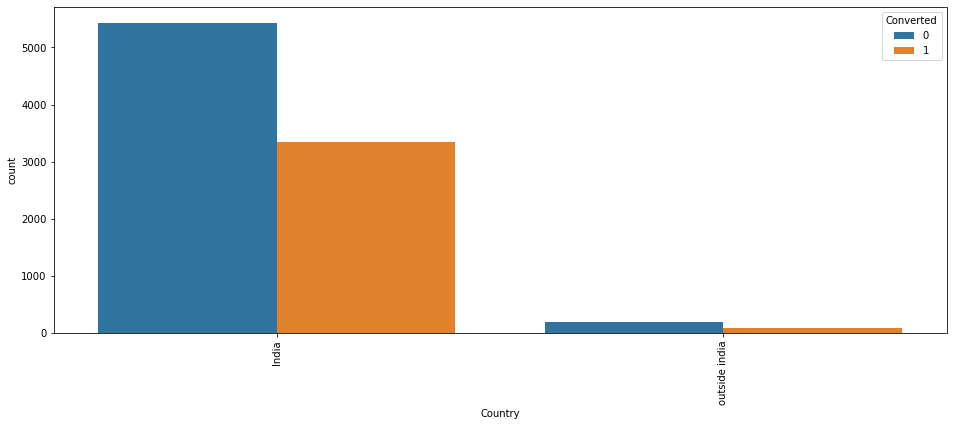

In [269]:
# Graph of Country columnn after replacing NaN values

plt.figure(figsize=(16,6))
s1 = sns.countplot(lead.Country, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

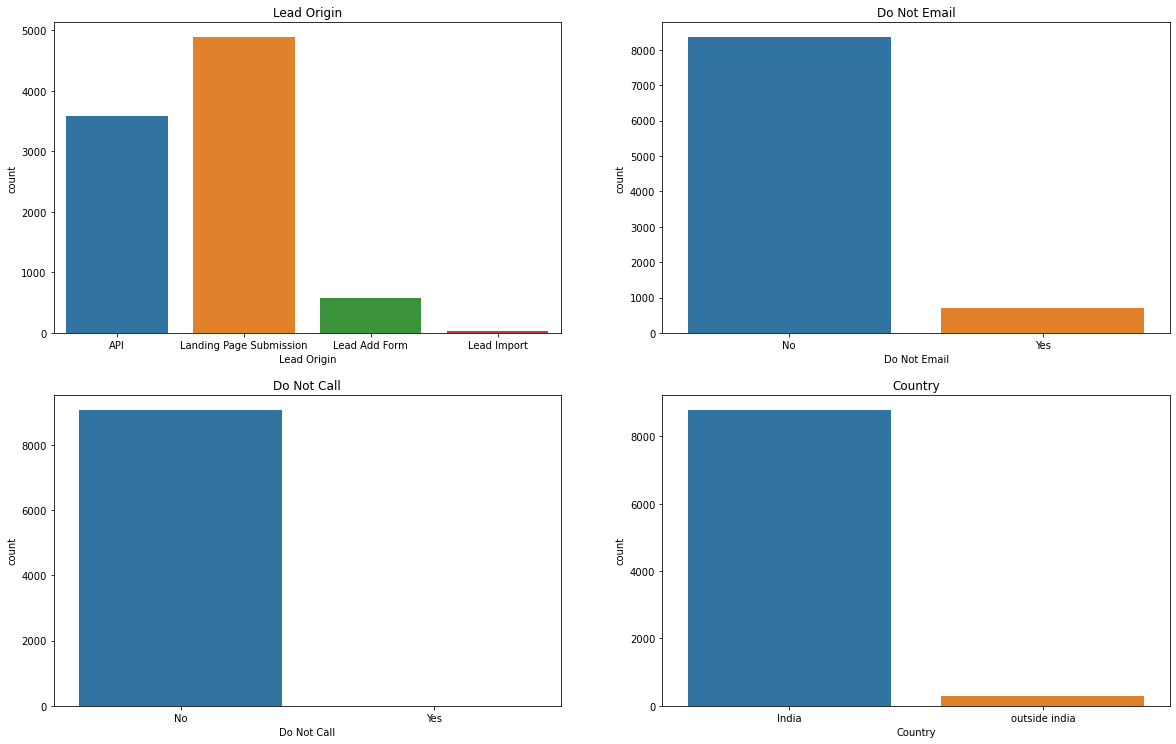

In [270]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead['Country'])
plt.title('Country')

plt.show()

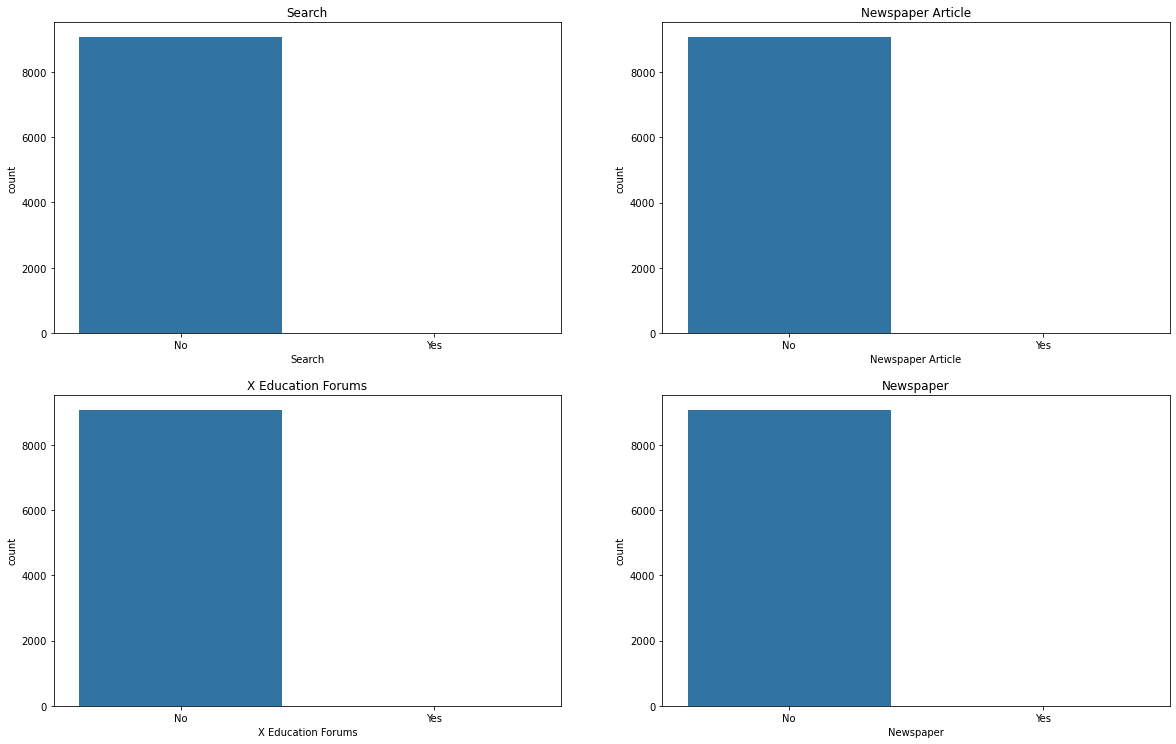

In [271]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(6,2,2)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,3)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,4)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.show()

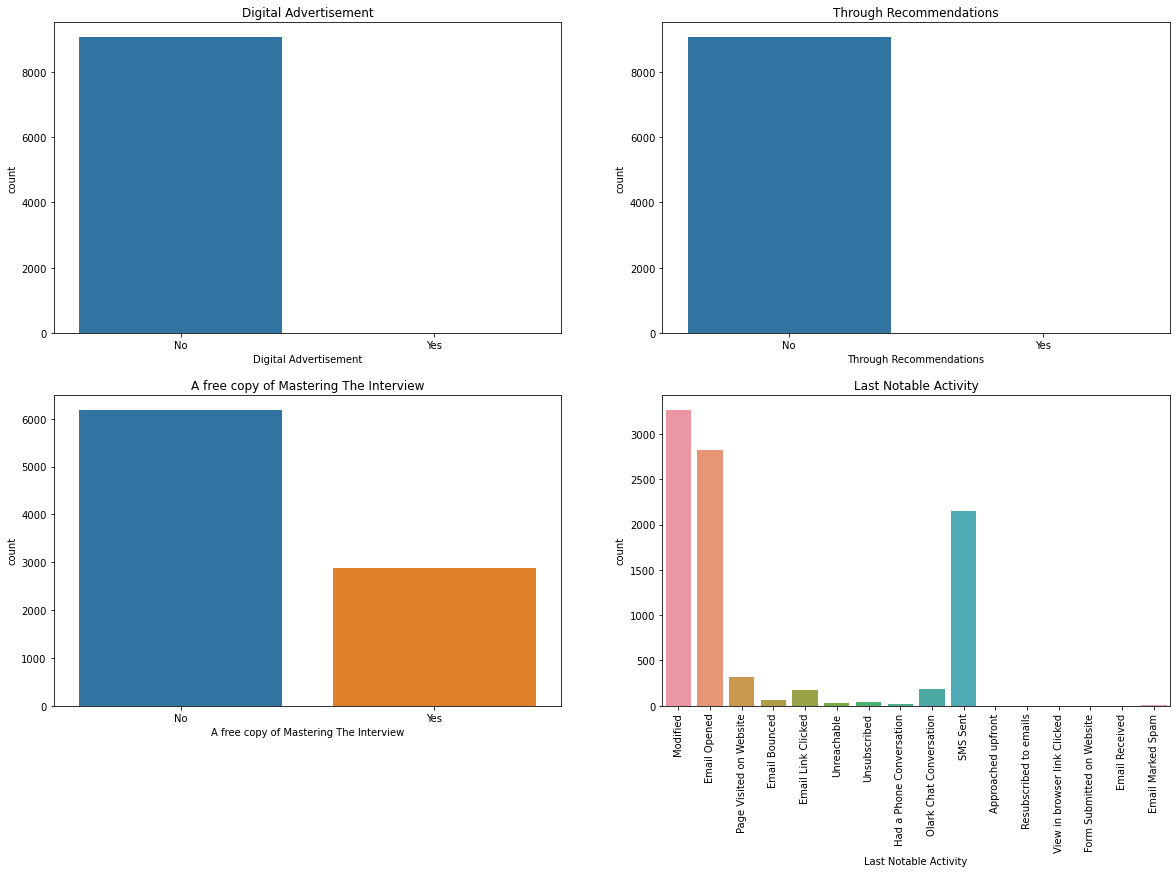

In [272]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,2)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,3)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,4)
sns.countplot(lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

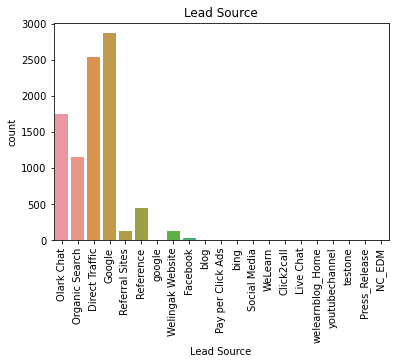

In [273]:
sns.countplot(lead['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

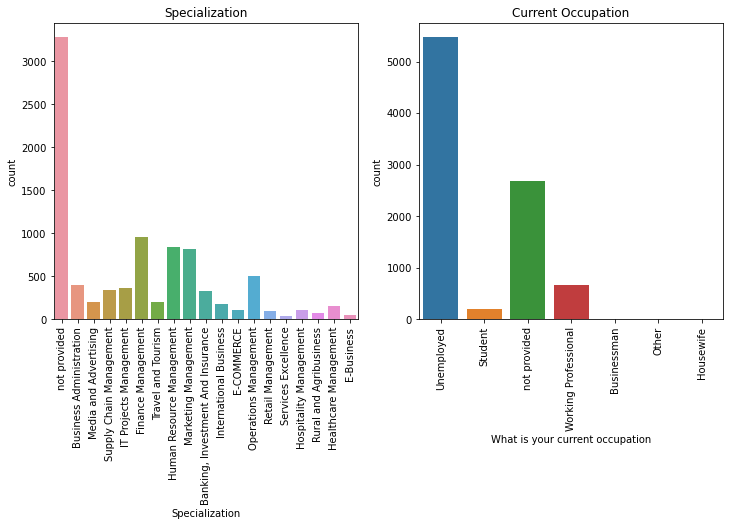

In [274]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.countplot(lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(lead['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.show()

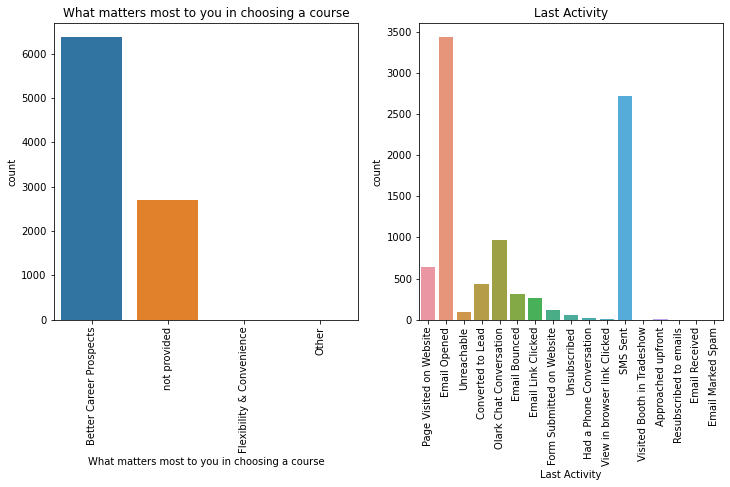

In [275]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.countplot(lead['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,2)
sns.countplot(lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

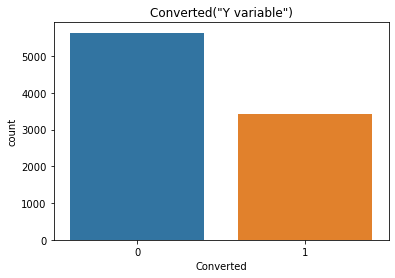

In [276]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Numerical variables

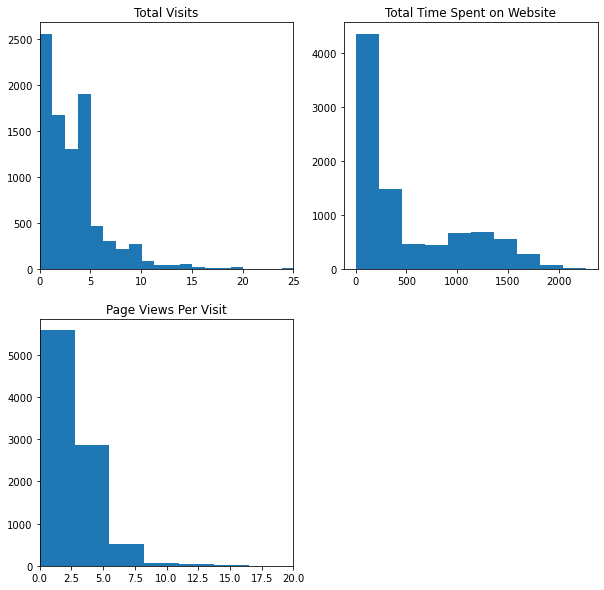

In [277]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show( )   

### Comparision of categorical variables with Converted

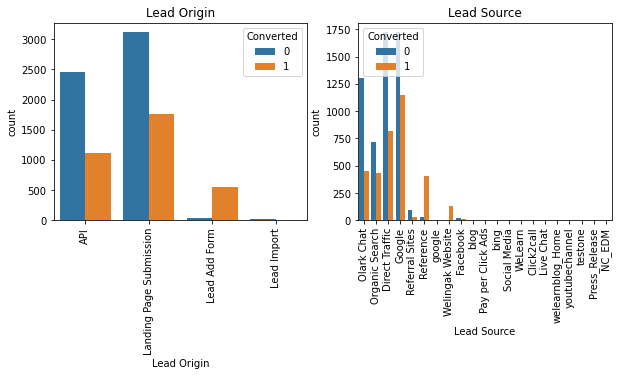

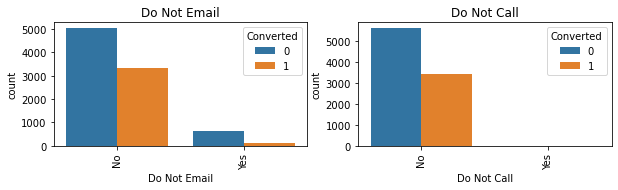

In [278]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.figure(figsize = (10,5))

plt.subplot(2,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(2,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')


plt.show()

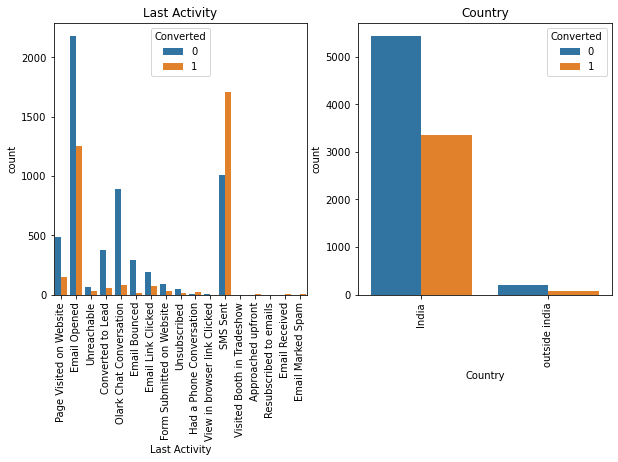

In [279]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

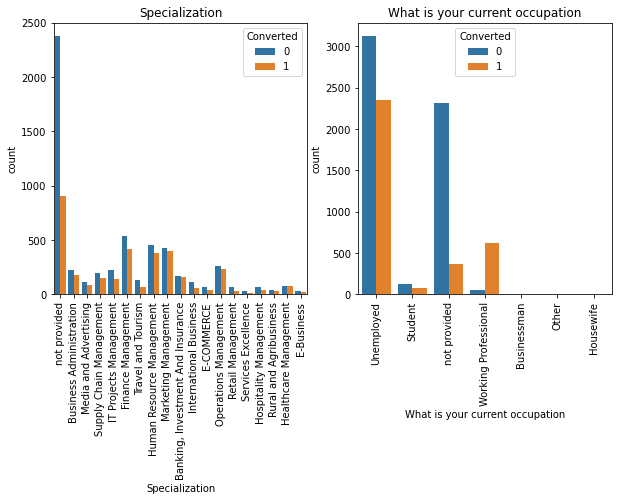

In [280]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

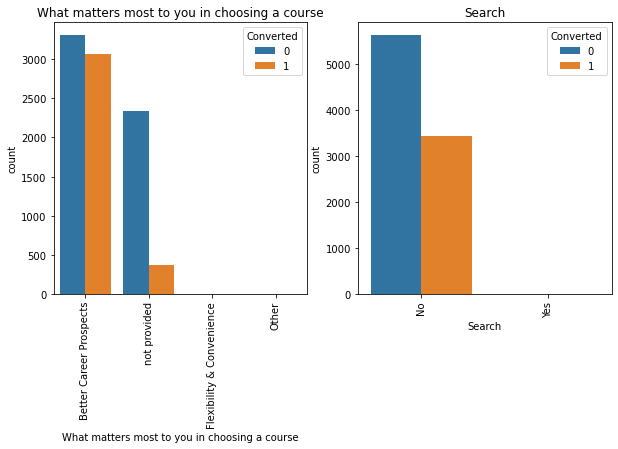

In [281]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

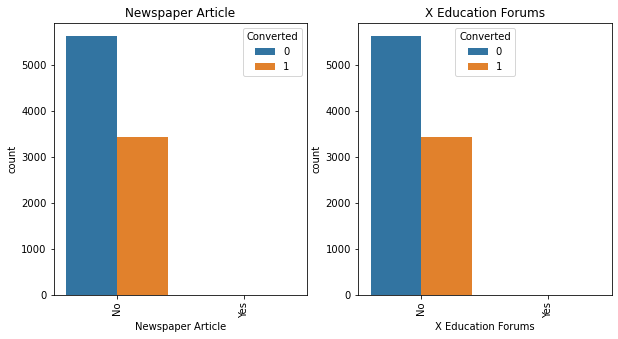

In [282]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

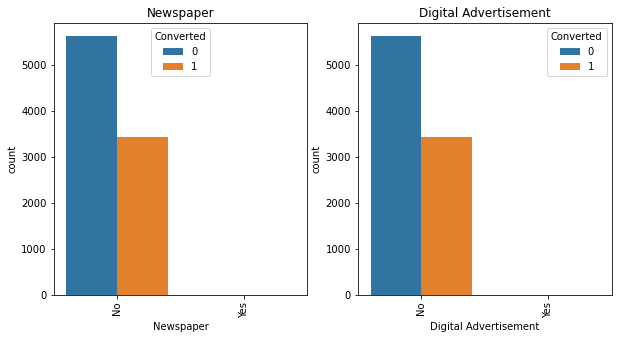

In [283]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

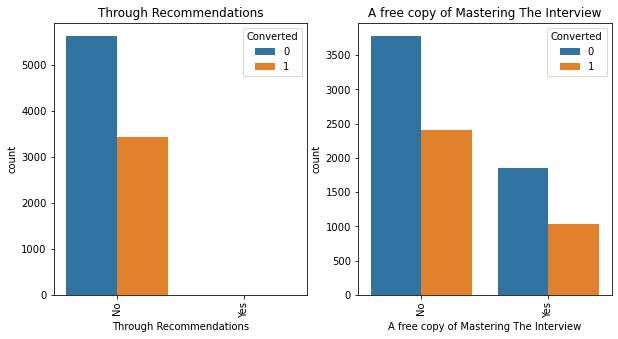

In [284]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

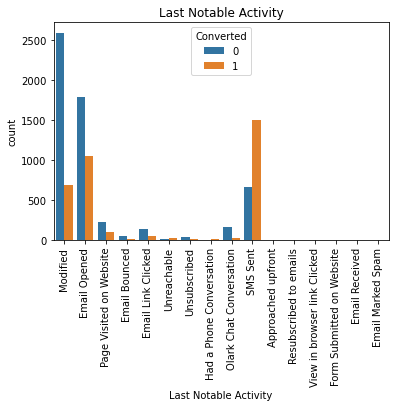

In [285]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

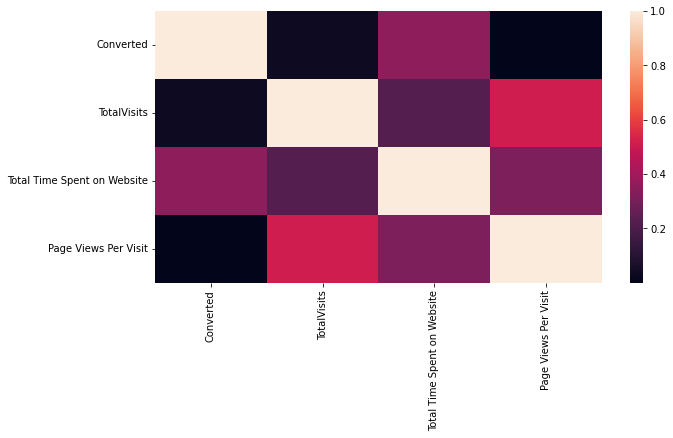

In [286]:
# correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(lead.corr())
plt.show()

### Outlier Treatment

In [287]:
numeric = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


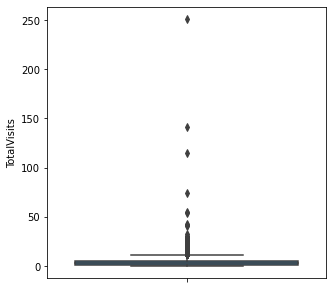

In [288]:
plt.figure(figsize = (5,5))

sns.boxplot(y=lead['TotalVisits'])

plt.show()

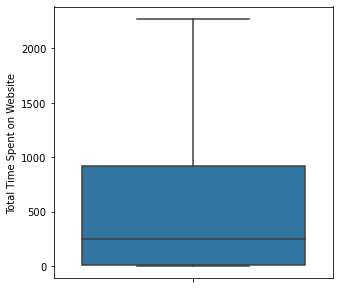

In [289]:
plt.figure(figsize = (5,5))

sns.boxplot(y=lead['Total Time Spent on Website'])

plt.show()

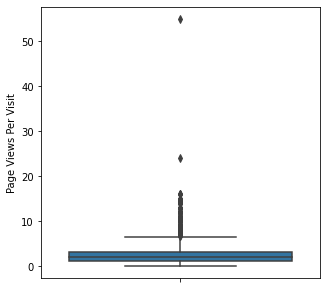

In [290]:
plt.figure(figsize = (5,5))

sns.boxplot(y=lead['Page Views Per Visit'])

plt.show()

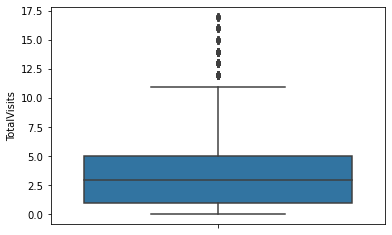

In [291]:
#Outlier Treatment: we will remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]

Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]

sns.boxplot(y=lead['TotalVisits'])

plt.show()

### Dummy variables 

In [292]:
#list of columns to be dropped

cols_to_drop=['Country','Tags']

#### Observations:

- We have seen that Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped.
- We can drop "Tags" ,As tags variable is generated by the sales team after the disscussion with students otherwise
  it will increase the model accuracy .

#### Dropping columns

In [293]:
#dropping columns

lead = lead.drop(cols_to_drop,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [294]:
lead.shape

(8991, 21)

In [295]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [296]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [297]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(lead[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 
                             'What is your current occupation','A free copy of Mastering The Interview', 
                             'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe

lead_dum = pd.concat([lead, dummy], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Better Career Prospects,No,No,No,No,No,No,not provided,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,not provided,...,Better Career Prospects,No,No,No,No,No,No,not provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,not provided,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [298]:
lead_dum = lead_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 
                          'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided',
                          'What is your current occupation','What matters most to you in choosing a course', 
                          'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
                          'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [299]:
lead.shape

(8991, 21)

### Test-Train Split

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X = lead_dum.drop(['Converted'], 1)
y = lead_dum['Converted']

In [302]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [303]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6293, 81)
(2698, 81)
(6293,)
(2698,)


In [304]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [305]:
# Logistic Regression
#import libraries

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [306]:
# import RFE

from sklearn.feature_selection import RFE

In [307]:
rfe = RFE(lr,20)
rfe = rfe.fit(X_train, y_train)

In [308]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Specialization_Business Administration', False, 34),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_Finance Management', False, 27),
 ('Specialization_Healthcare Management', False, 31),
 ('Specialization_Hospitality Management', False, 59),
 ('Specialization_Human Resource Management', False, 30),
 ('Specialization_IT Projects Management', False, 32),
 ('Specialization_International Business', False, 36),
 ('Specialization_Marketing Management', False, 28),
 ('Specialization_Media and Advertising', False, 35),
 ('Specialization_Operations Management', False, 33),
 ('Specialization_Retail Management', False, 49),
 ('Specialization_Rural and Agribusiness', False, 15),
 ('Specialization_Servi

In [309]:
# We will put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [310]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [311]:
# we will import statsmodels

import statsmodels.api as sm

In [312]:
X_train_sm = sm.add_constant(X_train)
lm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.9
Date:                Sat, 12 Nov 2022   Deviance:                       5011.7
Time:                        15:34:18   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3332      0.121     -2.761      0.006      -0.570      -0.097
TotalVisits                                              1.6794      0.304      5.527      0.000       1.084       2.275
Total Time Spent on Website                              4.6396      0.172     27.019      0.000       4.303       4.976
Page Views Per Visit                                    -1.4283      0.431     -3.313      0.001      -2.273      -0.583
Lead Origin_Lead Add Form                                2.7772      0.264     10.533      0.000       2.260       3.294
Lead Source_Direct Traffic                              -1.6810      0.134    -12.555      0.000      -1.943      -1.419
Lead Source_Google                                      -1.2843      0.132     -9.744      0.000      -1.543      -1.026
Lead Source_Organic Search                              -1.4902      0.163     -9.123      0.000      -1.810      -1.170
Lead Source_Referral Sites                              -1.4269      0.364     -3.917      0.000      -2.141      -0.713
Lead Source_Welingak Website                             2.3494      1.046      2.245      0.025       0.299       4.400
Do Not Email_Yes                                        -1.7942      0.178    -10.081      0.000      -2.143      -1.445
Last Activity_Olark Chat Conversation                   -1.1525      0.195     -5.913      0.000      -1.535      -0.770
What is your current occupation_Housewife               23.7780   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
What is your current occupation_Student                  1.1484      0.240      4.793      0.000       0.679       1.618
What is your current occupation_Unemployed               1.0738      0.089     12.101      0.000       0.900       1.248
What is your current occupation_Working Professional     3.6212      0.203     17.868      0.000       3.224       4.018
Last Notable Activity_Email Link Clicked                -1.8309      0.263     -6.973      0.000      -2.346      -1.316
Last Notable Activity_Email Opened                      -1.4716      0.091    -16.194      0.000      -1.650      -1.294
Last Notable Activity_Modified                          -1.7900      0.100    -17.942      0.000      -1.986      -1.594
Last Notable Activity_Olark Chat Conversation           -1.8074      0.398     -4.545      0.000      -2.587      -1.028
Last Notable Activity_Page Visited on Website           -1.8006      0.222     -8.110      0.000      -2.236      -1.365
========================================================================================================================
"""

In [313]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.82
4,Lead Source_Direct Traffic,3.34
13,What is your current occupation_Unemployed,2.73
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
17,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
16,Last Notable Activity_Email Opened,1.74


 - we will remove ' What is your current occupation_Housewife' which is having high p-values

In [315]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [316]:
# Model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.7
Date:                Sat, 12 Nov 2022   Deviance:                       5021.4
Time:                        15:34:18   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3248      0.120     -2.696      0.007      -0.561      -0.089
TotalVisits                                              1.6719      0.304      5.507      0.000       1.077       2.267
Total Time Spent on Website                              4.6339      0.171     27.026      0.000       4.298       4.970
Page Views Per Visit                                    -1.4364      0.431     -3.335      0.001      -2.281      -0.592
Lead Origin_Lead Add Form                                2.8374      0.264     10.766      0.000       2.321       3.354
Lead Source_Direct Traffic                              -1.6737      0.134    -12.515      0.000      -1.936      -1.412
Lead Source_Google                                      -1.2758      0.132     -9.691      0.000      -1.534      -1.018
Lead Source_Organic Search                              -1.4731      0.163     -9.033      0.000      -1.793      -1.153
Lead Source_Referral Sites                              -1.4202      0.364     -3.902      0.000      -2.134      -0.707
Lead Source_Welingak Website                             2.2948      1.046      2.193      0.028       0.244       4.346
Do Not Email_Yes                                        -1.7952      0.178    -10.083      0.000      -2.144      -1.446
Last Activity_Olark Chat Conversation                   -1.1514      0.195     -5.910      0.000      -1.533      -0.770
What is your current occupation_Student                  1.1317      0.240      4.724      0.000       0.662       1.601
What is your current occupation_Unemployed               1.0583      0.088     11.989      0.000       0.885       1.231
What is your current occupation_Working Professional     3.6050      0.202     17.807      0.000       3.208       4.002
Last Notable Activity_Email Link Clicked                -1.8104      0.260     -6.963      0.000      -2.320      -1.301
Last Notable Activity_Email Opened                      -1.4662      0.091    -16.149      0.000      -1.644      -1.288
Last Notable Activity_Modified                          -1.7904      0.100    -17.953      0.000      -1.986      -1.595
Last Notable Activity_Olark Chat Conversation           -1.8080      0.397     -4.549      0.000      -2.587      -1.029
Last Notable Activity_Page Visited on Website           -1.7993      0.222     -8.109      0.000      -2.234      -1.364
========================================================================================================================
"""

In [317]:
# VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.81
4,Lead Source_Direct Traffic,3.34
12,What is your current occupation_Unemployed,2.72
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
16,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
15,Last Notable Activity_Email Opened,1.73


 - we will drop 'Page Views Per Visit' which is high VIF value

In [318]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [319]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.3
Date:                Sat, 12 Nov 2022   Deviance:                       5032.6
Time:                        15:34:19   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3498      0.120     -2.913      0.004      -0.585      -0.114
TotalVisits                                              1.0910      0.248      4.393      0.000       0.604       1.578
Total Time Spent on Website                              4.6218      0.171     27.009      0.000       4.286       4.957
Lead Origin_Lead Add Form                                2.8433      0.264     10.789      0.000       2.327       3.360
Lead Source_Direct Traffic                              -1.7881      0.129    -13.823      0.000      -2.042      -1.535
Lead Source_Google                                      -1.3991      0.126    -11.071      0.000      -1.647      -1.151
Lead Source_Organic Search                              -1.6362      0.155    -10.532      0.000      -1.941      -1.332
Lead Source_Referral Sites                              -1.5811      0.362     -4.364      0.000      -2.291      -0.871
Lead Source_Welingak Website                             2.2962      1.046      2.194      0.028       0.245       4.347
Do Not Email_Yes                                        -1.8073      0.178    -10.169      0.000      -2.156      -1.459
Last Activity_Olark Chat Conversation                   -1.1418      0.195     -5.858      0.000      -1.524      -0.760
What is your current occupation_Student                  1.1304      0.240      4.715      0.000       0.661       1.600
What is your current occupation_Unemployed               1.0604      0.088     12.026      0.000       0.888       1.233
What is your current occupation_Working Professional     3.5963      0.202     17.783      0.000       3.200       3.993
Last Notable Activity_Email Link Clicked                -1.7718      0.259     -6.844      0.000      -2.279      -1.264
Last Notable Activity_Email Opened                      -1.4492      0.090    -16.019      0.000      -1.627      -1.272
Last Notable Activity_Modified                          -1.7698      0.099    -17.818      0.000      -1.964      -1.575
Last Notable Activity_Olark Chat Conversation           -1.7450      0.394     -4.425      0.000      -2.518      -0.972
Last Notable Activity_Page Visited on Website           -1.6582      0.216     -7.682      0.000      -2.081      -1.235
========================================================================================================================
"""

In [320]:
# VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.64
4,Lead Source_Google,3.39
3,Lead Source_Direct Traffic,3.01
11,What is your current occupation_Unemployed,2.72
1,Total Time Spent on Website,2.34
15,Last Notable Activity_Modified,2.26
5,Lead Source_Organic Search,2.25
9,Last Activity_Olark Chat Conversation,1.76
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.64


#### Analysis:
- All the VIF values are good and all the p-values are below 0.05. So we can fix model.

### Creating Prediction

In [321]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

1467    0.980598
108     0.031040
7858    0.568027
5220    0.413438
3871    0.141974
dtype: float64

In [322]:
# we will reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98059818, 0.03104002, 0.56802738, 0.413438  , 0.14197437,
       0.5903089 , 0.10720845, 0.03406225, 0.14197437, 0.06848407])

In [323]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.980598
1,0,0.031040
2,1,0.568027
3,1,0.413438
4,0,0.141974


In [324]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.980598,1
1,0,0.031040,0
2,1,0.568027,1
3,1,0.413438,0
4,0,0.141974,0


### Model Evaluation

In [325]:
# we will import metrics from sklearn for evaluation

from sklearn import metrics

In [326]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [327]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8221833783569045

 - 82% accuracy with is a very good value

In [328]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [329]:
# Calculating the sensitivity
TP/(TP+FN)

0.7068018588931136

In [330]:
# Calculating the specificity
TN/(TN+FP)

0.89174732552216

 - With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 89%.

### Optimise Cut off (ROC Curve)

 - Previous cut off was randomely selected. Now to find the optimum one

In [331]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [332]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )


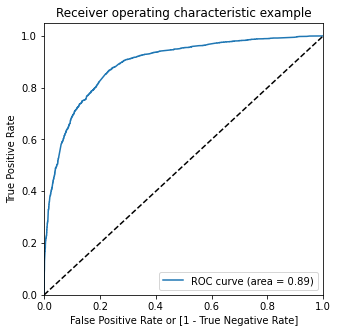

In [333]:
# ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

 - The area under ROC curve is 0.89 which is a very good value

In [334]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0


In [335]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.621325,0.967047,0.412888
0.2,0.2,0.772287,0.913815,0.686959
0.3,0.3,0.804863,0.865230,0.768467
0.4,0.4,0.815509,0.773131,0.841060
0.5,0.5,0.822183,0.706802,0.891747
0.6,0.6,0.811378,0.625264,0.923586
0.7,0.7,0.784205,0.506548,0.951605
0.8,0.8,0.766089,0.428390,0.969689
0.9,0.9,0.720483,0.275454,0.988793


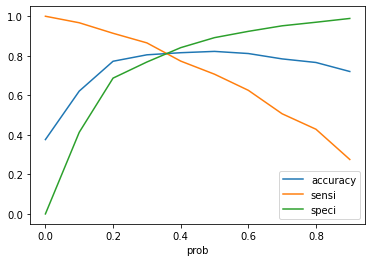

In [336]:
# Plotting

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 - From the graph it is visible that the optimal cut off is at 0.35.

In [337]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [338]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8102653742253297

In [339]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3200,  726],
       [ 468, 1899]], dtype=int64)

In [340]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [341]:
# Calculating the sensitivity
TP/(TP+FN)

0.8022813688212928

In [342]:
# Calculating the specificity
TN/(TN+FP)

0.8150789607743251

 - With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

### Prediction on Test set

In [343]:
 #Numeric values Scaling

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 
                                                                    'Page Views Per Visit', 'Total Time Spent on Website']])


In [344]:
col = X_train.columns


In [345]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,1.0,0.176471,0.133803,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6126,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5198,1.0,0.176471,0.187060,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4979,1.0,0.235294,0.378961,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9225,1.0,0.117647,0.032570,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [346]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [347]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.433761,1
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0


In [348]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8042994810971089

In [349]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1344,  322],
       [ 206,  826]], dtype=int64)

In [350]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [351]:
# Calculating the sensitivity
TP/(TP+FN)

0.8003875968992248

In [352]:
# Calculating the specificity
TN/(TN+FP)

0.8067226890756303

 - With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

### Precision-Recall

In [353]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [354]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7974261201143946

In [355]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7068018588931136

 - With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

### Precision and recall tradeoff

In [356]:
from sklearn.metrics import precision_recall_curve

In [357]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

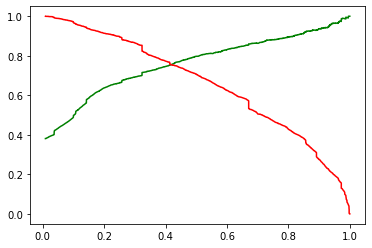

In [358]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [359]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [360]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8167805498172572

In [361]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3321,  605],
       [ 548, 1819]], dtype=int64)

In [362]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [363]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7504125412541254

In [364]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7684833122095479

 - With the current cut off as 0.41 we have Precision around 75% and Recall around 76% and accuracy 82 %.

### Prediction on Test set

In [365]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [366]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.433761,0
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0


### Check the overall accuracy

In [367]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8065233506300964

In [368]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1411,  255],
       [ 267,  765]], dtype=int64)

In [369]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [370]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.75

In [371]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7412790697674418

 - With the current cut off as 0.41 we have Precision around 75% , Recall around 74% and accuracy 80.6%.

 - The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

### Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

- TotalVisits
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Lead Source_Direct Traffic
- Lead Source_Google
- Lead Source_Organic Search
- Lead Source_Referral Sites
- Lead Source_Welingak Website
- Do Not Email_Yes
- Last Activity_Olark Chat Conversation
- What is your current occupation_Student
- What is your current occupation_Unemployed
- What is your current occupation_Working Profes...
- Last Notable Activity_Email Link Clicked
- Last Notable Activity_Email Opened
- Last Notable Activity_Modified
- Last Notable Activity_Olark Chat Conversation
- Last Notable Activity_Page Visited on Website

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.